In [4]:
# Importing Libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Forward Propagate
def forward_propagate(W, X, b):
    return (W @ X + b).reshape(1, X.shape[1])

In [6]:
# Cost Function
def compute_cost(y_hat, y):
    return 1 /(2 * y.shape[1]) * ((y_hat - y) @ (y_hat - y).T)

In [7]:
# Import Dataset
df = pd.read_csv('ex1data1.csv')

X = torch.tensor(df['W'].values).reshape(df['W'].shape[0], 1).T
y = torch.tensor(df['Y'].values).reshape(df['Y'].shape[0], 1).T

X = X.float()
y = y.float()

In [8]:
# Naive Implementation to find best weight
def find_best_weight(start, end, increment, X_t, y_t, b):
    costs = []
    weights = []
    best_weight = 0
    best_cost = 100000
    for w in torch.arange(start, end, increment):
        y_pred = forward_propagate(w.reshape(1, 1), X_t, b)
        costs.append(compute_cost(y_pred, y_t))
        weights.append(w)
        if(compute_cost(y_pred, y_t) < best_cost):
            best_cost = compute_cost(y_pred, y_t)
            best_weight = w
    return costs, weights, best_weight.reshape(1, 1)

In [9]:
# Function to plot Costs vs Weights
def plot_costs_vs_weights(costs_p, weights_p):
    plt.title('Costs vs Weights')
    plt.xlabel('Weights')
    plt.ylabel('Costs')
    plt.plot(weights_p, costs_p)
    plt.show()

In [10]:
# Function to plot Dataset
def plot_dataset(X_t, y_t):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    plt.show()

In [11]:
# Function to plot Dataset with Model
def plot_dataset_with_model(X_t, y_t, best_weight, b):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    
    # Print Line
    y_pred = []
    line_start, _ = torch.min(X_t, 1)
    line_end, _ = torch.max(X_t, 1)
    for x in range(int(line_start.item()) - 5, int(line_end.item()) + 5):
        y_pred.append(best_weight * x + b)
    plt.plot(range(int(line_start.item()) - 5, int(line_end.item()) + 5), y_pred, color = 'b')
    plt.show()

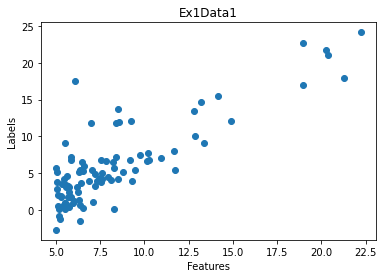

In [12]:
plot_dataset(X, y)

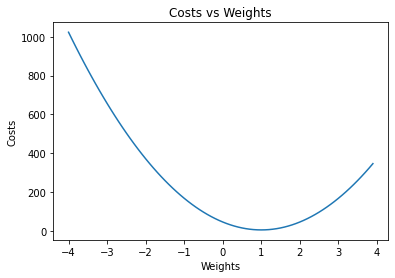

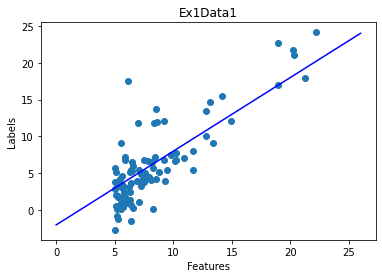

In [13]:
bias = torch.Tensor([[-2]])
costs, weights, best_weight = find_best_weight(-4, 4, 0.1, X, y, bias)
plot_costs_vs_weights(costs, weights)
plot_dataset_with_model(X, y, best_weight, bias)

In [280]:
# Gradient Descent on y = w * x + b

# Functions that initializes variable
def initialize():
    W = torch.Tensor([[0]])
    b = torch.Tensor([[0]])
    return [W, b]

# Function which calculates gradients
def get_grads(W, X, y, b):
    y_hat = forward_propagate(W, X, b)
    m = y.shape[1]
    grad1 = 1 / m * ((y_hat - y) @ X.T)
    grad2 = 1 / m * torch.sum((y_hat - y), axis = 1, keepdims = True)
    return [grad1, grad2]

# Function to update parameters
def update_params(W, b, grads, learning_rate):
    return [W - learning_rate * grads[0], b - learning_rate * grads[1]]

# Function with performs Gradient Descent
def gradient_descent(W, X, y, b, iterations, learning_rate):
    costs = []
    for epoch in range(iterations):
        grads = get_grads(W, X, y, b)
        [W, b] = update_params(W, b, grads, learning_rate)
        l = compute_cost(forward_propagate(W, X, b), y)
        if epoch % 100 == 0:
            print("Epoch :", epoch, "Loss :", l.item())
        costs.append(l.item())
    plot_dataset_with_model(X, y, W, b)
    
    return W, b, costs


In [281]:
# Function that plots costs vs iterations
def plot_log(costs):
    plt.title('Cost vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(costs)
    plt.show()

Epoch : 0 Loss : 16.769641876220703
Epoch : 100 Loss : 5.170668125152588
Epoch : 200 Loss : 4.813839912414551
Epoch : 300 Loss : 4.640559196472168
Epoch : 400 Loss : 4.556411266326904


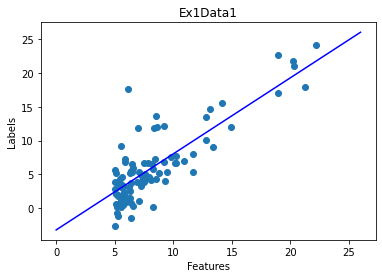

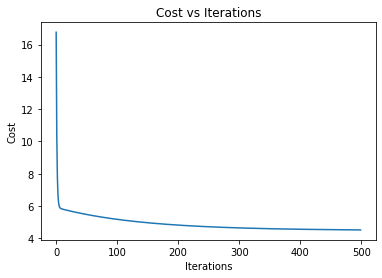

In [282]:
[W, b] = initialize()
W, b, costs = gradient_descent(W, X, y, b, 500, 0.02)
plot_log(costs)

In [63]:
print(W, b)

tensor([[1.1274]]) tensor([[-3.2425]])


In [301]:
# Gradient Descent for y =  w1x^2 + w2x + b
# Non vectorized

# Function to plot Dataset with Model
def plot_dataset_with_model_two(X_t, y_t, W1, W2, b):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    
    # Print Line
    y_pred = []
    curve_start, _ = torch.min(X_t, 1)
    curve_end, _ = torch.max(X_t, 1)
    for x in range(int(curve_start.item()) - 5, int(curve_end.item()) + 5):
        y_pred.append((W1 * x * x + W2 * x + b))
    plt.plot(range(int(curve_start.item()) - 5, int(curve_end.item()) + 5), y_pred, color = 'b')
    plt.show()

# Function that intitializes parameters
def initialize_two():
    W1 = torch.zeros(1, 1)
    W2 = torch.zeros(1, 1)
    b = torch.zeros(1, 1)
    return W1, W2, b

def forward_propagate_two(W1, W2, x, b_t):
    return W1 * x * x + W2 * x + b_t

def compute_loss(y_hat, y, m):
    return 1 / (2 * m) * (y_hat - y) * (y_hat - y)

# Function to calculate gradients
def compute_grads_two(W1, W2, X, b_t, y):
    gradW1 = 0
    gradW2 = 0
    gradb = 0
    cost = 0
    m = y.shape[1]
    for x_val, y_val in zip(X[0], y[0]):
        y_pred = forward_propagate_two(W1, W2, x_val, b_t)
        loss = compute_loss(y_pred, y_val, m)
        gradW1 += 2 * x_val * x_val * (y_pred - y_val)
        gradW2 += 2 * x_val * (y_pred - y_val)
        gradb += 2 * (y_pred - y_val)
        cost += loss
    return [gradW1, gradW2, gradb, cost]

# Function to update parameters
def update_params_two(W1, W2, b_t, grads, learning_rate):
    W1 = W1 - learning_rate * grads[0]
    W2 = W2 - learning_rate * grads[1]
    b_t = b_t - learning_rate * grads[2]
    return [W1, W2, b_t]

# Function with performs Gradient Descent
def gradient_descent_two(W1, W2, X, y, b_t, iterations, learning_rate):
    costs = []
    for epoch in range(iterations):
        grads = compute_grads_two(W1, W2, X, b_t, y)
        [W1, W2, b_t] = update_params_two(W1, W2, b_t, grads, learning_rate)
        costs.append(grads[3])
        if epoch % 1000 == 0:
            print("Epoch :", epoch, "Loss :", grads[3].item())
        costs.append(grads[3].item())
    plot_dataset_with_model_two(X, y, W1, W2, b)
    return W1, W2, b_t, costs


In [ ]:
[W1, W2, b] = initialize_two()
W1, W2, b, costs = gradient_descent_two(W1, W2, X, y, b, 10001, 0.0000001);

Epoch : 0 Loss : 32.07273483276367
Epoch : 1000 Loss : 5.350980281829834


In [ ]:
plot_log(costs)

In [ ]:
# MultiVariate + Vectorized
# Function to plot Dataset with Model
def plot_dataset_with_model_m(W_t, X_t, b_t, y_t):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    
    # Print Line
    y_pred = []
    curve_start, _ = torch.min(X_t, 1)
    curve_end, _ = torch.max(X_t, 1)
    for x in range(int(curve_start.item()) - 5, int(curve_end.item()) + 5):
        y_pred.append(forward_propagate_m(W_t, X_t, b_t))
    plt.plot(range(int(curve_start.item()) - 5, int(curve_end.item()) + 5), y_pred, color = 'b')
    plt.show()

# Function that intitializes parameters
def initialize_m(n_features):
    W = torch.zeros(n_features, 1)
    b = torch.zeros(1, 1)
    return W, b

# Forward Pass
def forward_propagate_m(W, X, b):
    y_pred = W.T @ X + b
    return W.T @ X + b

# Cost Function
def compute_loss_m(y_hat, y_t):
    return 1 / (2 * y_t.shape[1]) * (y_hat - y_t) @ (y_hat - y_t).T

# Function to calculate gradients
def compute_grads_m(W_t, X_t, b_t, y_t):
    m = y_t.shape[1]
    y_pred = forward_propagate_m(W_t, X_t, b_t)
    gradW = 1 / m * (X_t @ (y_pred - y_t).T)
    gradb = 1 / m * torch.sum((y_pred - y_t), axis = 1, keepdims = True)
    return [gradW, gradb]

# Function to update parameters
def update_params_m(W_t, b_t, gradW, gradb, learning_rate):
    W_t -= learning_rate * gradW
    b_t -= learning_rate * gradb
    return [W_t, b_t]

# Function with performs Gradient Descent
def gradient_descent_m(W_t, X_t, b_t, y_t, iterations, learning_rate):
    costs = []
    for epoch in range(iterations):
        gradW, gradb = compute_grads_m(W_t, X_t, b_t, y_t)
        W_t, b_t = update_params_m(W_t, b_t, gradW, gradb, learning_rate)
        loss = compute_loss_m(forward_propagate_m(W_t, X_t, b_t), y_t).item()
        if epoch % 1000 == 0:
            print("Epoch :", epoch, "Loss :", loss)
    return W_t, b_t, costs


In [ ]:
W, b = initialize_m(2)
X_new = torch.cat((X, torch.pow(X, 2)))
print(X_new.shape)
W, b, costs = gradient_descent_m(W, X_new, b, y, 10001, 0.00001);

In [ ]:
plot_dataset_with_model_two(X, y, W[1][0], W[0][0], b)